In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
data=pd.read_csv(r'E:\Jupyter projects\Datasets\Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df=data.drop(['Gender'],axis=1)

In [5]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
data.Gender[data['Gender'] == 'Male'] = 1
data.Gender[data['Gender'] == 'Female'] = 2

C:\Users\jbsan\AppData\Local\Temp\ipykernel_14904\1666635574.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data.Gender[data['Gender'] == 'Male'] = 1
C:\Users\jbsan\AppData\Local\Temp\ipykernel_14904\1666635574.py:1: SettingWithCopyWarn

In [7]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)

In [8]:
from sklearn.cluster import KMeans
kmeans=KMeans(5,random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=5, random_state=42)

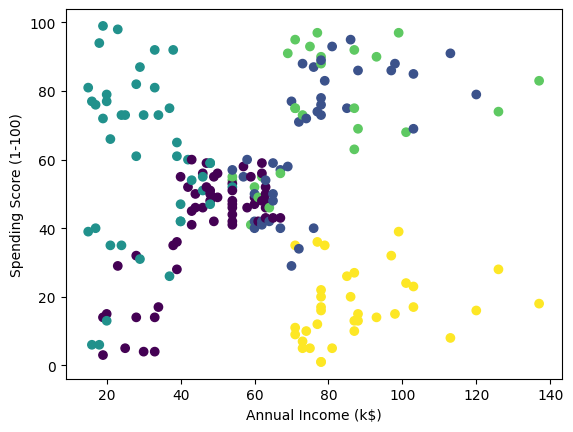

In [10]:
data['Cluster']=kmeans.labels_
import matplotlib.pyplot as plt
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'],c=data['Cluster'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()